In [3]:
!pip install module facebook-sdk

  Using cached module-0.2.1.tar.gz
  Running setup.py bdist_wheel for module ... done
  Stored in directory: /Users/Goof/Library/Caches/pip/wheels/94/55/3c/643c74ed7d22d51e4e8193b1506814ac8b7118b3ac3fe9de38
  Running setup.py bdist_wheel for facebook-sdk ... done
  Stored in directory: /Users/Goof/Library/Caches/pip/wheels/74/8d/c2/632884cecf25d1a584677403dc4b149563e6336d2cd8d2834c
Successfully built module facebook-sdk


In [8]:
!pip install requests


In [121]:
#page info

import json
import requests
import facebook

if __name__ == '__main__':
    page = "Hahanoyume"
    token = 'EAAEkuTV9DUMBAIPQ95dBOsG7SlRYiF8cqgv2MsAJshtqZAbfPjVz5IYackeFHNZC3dZAKU7XcvkYopQAxMKFLNsoeHzeXRJu8BH8UiI7VBvq9rSdS5LtDren6QtJhSVZBdLhov0bk9jG478O1BtTgyjPHgFCJOewtNUNozw1TAZDZD'

    fields = [
        'id',
        'name',
        'about',
        'likes',
        'website',
        'link',
        'location',
        'fan_count'
    ]
    fields = ','.join(fields)
    graph = facebook.GraphAPI(token)
    page = graph.get_object(page, fields=fields)
    
    
    print(json.dumps(page, indent=4))

   

{
    "id": "1551805975083245",
    "name": "Haha no yume \u6bcd\u306e\u5922",
    "about": "Japanese kimono inspired baby-wear - rompers, tops and dresses ethically made of 100% imported cotton from Osaka, Japan ",
    "likes": {
        "data": [
            {
                "name": "Kaleidoscope - lifestyle store",
                "id": "202048279814065"
            },
            {
                "name": "BlueCicada Photography - La Vie Telle Qu'elle Est",
                "id": "198941320152236"
            },
            {
                "name": "Hello Deer",
                "id": "264273913608746"
            }
        ],
        "paging": {
            "cursors": {
                "before": "MjAyMDQ4Mjc5ODE0MDY1",
                "after": "MjY0MjczOTEzNjA4NzQ2"
            }
        }
    },
    "website": "http://www.hahanoyume.com",
    "link": "https://www.facebook.com/Hahanoyume/",
    "location": {
        "city": "Kuala Lumpur",
        "country": "Malaysia",
        "l

In [100]:
#get page post and save it as a json file
import json
import requests
import facebook

if __name__ == '__main__':
    page = "Hahanoyume"
    n = 100 #default=100, no of pages downloaded


    token = 'EAAEkuTV9DUMBAOtLnj90wfaMt0INbd8mreAOVFIfOjXwrKv1s2HcmcZAjeLtZCWaZCg7qXjZAxcv710VwlOG2tXquOs2ck0EqU4Bj7F6DQjOtMdd28ZA0t1HHDedUi72bt9xTBZA52c3cXxKcb0RaYfLt8DZBcLqN8ZD'
    graph = facebook.GraphAPI(token)
    all_fields = [
        'id',
        'type',
        'message',
        'created_time',
        'shares',
        'comments.summary(true){id, message, comments}',
        'reactions.type(LIKE).limit(0).summary(total_count).as(reactions_like)',
        'reactions.type(LOVE).limit(0).summary(total_count).as(reactions_love)',
        'reactions.type(HAHA).limit(0).summary(total_count).as(reactions_haha)',
        'reactions.type(WOW).limit(0).summary(total_count).as(reactions_wow)',
        'reactions.type(SAD).limit(0).summary(total_count).as(reactions_sad)',
        'reactions.type(ANGRY).limit(0).summary(total_count).as(reactions_angry)',
        'reactions.type(NONE).limit(0).summary(total_count).as(reactions_all)'
        
    ]
    all_fields = ','.join(all_fields)
    posts = graph.get_connections(page, 'posts', fields=all_fields)
    print("Currently printing the page posts")

    downloaded = 0
    while True:  # keep paginating
        if downloaded >= n:
            break
        try:
            fname = "output/posts10_{}.jsonl".format(page)
            with open(fname, 'a') as f:           
                for post in posts['data']:
                    downloaded += 1
                    f.write(json.dumps(post)+"\n")
                # get next page
                posts = requests.get(posts['paging']['next']).json()
        except KeyError:
            # no more pages, break the loop
            break

print("\n  !! Done printing posts !! ")



Currently printing the page posts

  !! Done printing posts !! 


In [90]:
#getting page post from 27 november 2017 - 26 december 2017 and save it to CSV
#code has been referred from http://minimaxir.com/2015/07/facebook-scraper/

import json
import datetime
import csv
import time
try:
    from urllib.request import urlopen, Request
except ImportError:
    from urllib2 import urlopen, Request


page_id = "hahanoyume"

# duration of since and until date
#since_date = "2017-11-27"
#until_date = "2017-12-26"

access_token = "EAAEkuTV9DUMBAIPQ95dBOsG7SlRYiF8cqgv2MsAJshtqZAbfPjVz5IYackeFHNZC3dZAKU7XcvkYopQAxMKFLNsoeHzeXRJu8BH8UiI7VBvq9rSdS5LtDren6QtJhSVZBdLhov0bk9jG478O1BtTgyjPHgFCJOewtNUNozw1TAZDZD"


def request_until_succeed(url):
    req = Request(url)
    success = False
    while success is False:
        try:
            response = urlopen(req)
            if response.getcode() == 200:
                success = True
        except Exception as e:
            print(e)
            time.sleep(5)

            print("Error for URL {}: {}".format(url, datetime.datetime.now()))
            print("Retrying.")

    return response.read()


# Needed to write tricky unicode correctly to csv
def unicode_decode(text):
    try:
        return text.encode('utf-8').decode()
    except UnicodeDecodeError:
        return text.encode('utf-8')


def getFacebookPageFeedUrl(base_url):

    # Fields consist of the reactions parameters that needed to be extracted
    fields = "&fields=message,link,created_time,type,name,id," + \
        "comments.limit(0).summary(true),shares,reactions" + \
        ".limit(0).summary(true)"

    return base_url + fields


def getReactionsForStatuses(base_url):
    # to get the post reactions result
    reaction_types = ['like', 'love', 'wow', 'haha', 'sad', 'angry']
    reactions_dict = {}   # this will tuple<5>

    for reaction_type in reaction_types:
        fields = "&fields=reactions.type({}).limit(0).summary(total_count)".format(
            reaction_type.upper())

        url = base_url + fields

        data = json.loads(request_until_succeed(url))['data']

        data_processed = set()  # set() removes rare duplicates in statuses
        for status in data:
            id = status['id']
            count = status['reactions']['summary']['total_count']
            data_processed.add((id, count))

        for id, count in data_processed:
            if id in reactions_dict:
                reactions_dict[id] = reactions_dict[id] + (count,)
            else:
                reactions_dict[id] = (count,)

    return reactions_dict


def processFacebookPageFeedStatus(status):

    # The status is now a Python dictionary, so for top-level items,
    # we can simply call the key.

    # Additionally, some items may not always exist,
    # so must check for existence first

    status_id = status['id']
    status_type = status['type']

    status_message = '' if 'message' not in status else \
        unicode_decode(status['message'])
    link_name = '' if 'name' not in status else \
        unicode_decode(status['name'])
    status_link = '' if 'link' not in status else \
        unicode_decode(status['link'])

    # Time needs special care since a) it's in UTC and
    # b) it's not easy to use in statistical programs.

    status_published = datetime.datetime.strptime(
        status['created_time'], '%Y-%m-%dT%H:%M:%S+0000')
    status_published = status_published + \
        datetime.timedelta(hours=-5)  # EST
    status_published = status_published.strftime(
        '%Y-%m-%d %H:%M:%S')  # best time format for spreadsheet programs

    # Nested items require chaining dictionary keys.

    num_reactions = 0 if 'reactions' not in status else \
        status['reactions']['summary']['total_count']
    num_comments = 0 if 'comments' not in status else \
        status['comments']['summary']['total_count']
    num_shares = 0 if 'shares' not in status else status['shares']['count']

    return (status_id, status_message, link_name, status_type, status_link,
            status_published, num_reactions, num_comments, num_shares)


def scrapeFacebookPageFeedStatus(page_id, access_token, since_date, until_date):
    with open('{}_facebook_statuses5.csv'.format(page_id), 'w') as file:
        w = csv.writer(file)
        w.writerow(["status_id", "status_message", "link_name", "status_type",
                    "status_link", "status_published", "num_reactions",
                    "num_comments", "num_shares", "num_likes", "num_loves",
                    "num_wows", "num_hahas", "num_sads", "num_angrys",
                    "num_special"])

        has_next_page = True
        num_processed = 0
        scrape_starttime = datetime.datetime.now()
        after = ''
        base = "https://graph.facebook.com/v2.11"
        node = "/{}/posts".format(page_id)
        parameters = "/?limit={}&access_token={}".format(100, access_token)
       # since = "&since={}".format(since_date) if since_date \
           # is not '' else ''
        #until = "&until={}".format(until_date) if until_date \
          #  is not '' else ''

        print("Scraping {} Facebook Page: {}\n".format(page_id, scrape_starttime))

        while has_next_page:
            after = '' if after is '' else "&after={}".format(after)
            base_url = base + node + parameters + after #+ since + until

            url = getFacebookPageFeedUrl(base_url)
            statuses = json.loads(request_until_succeed(url))
            reactions = getReactionsForStatuses(base_url)

            for status in statuses['data']:

                # Ensure it is a status with the expected metadata
                if 'reactions' in status:
                    status_data = processFacebookPageFeedStatus(status)
                    reactions_data = reactions[status_data[0]]

                    # calculate thankful/pride through algebra
                    num_special = status_data[6] - sum(reactions_data)
                    w.writerow(status_data + reactions_data + (num_special,))

                num_processed += 1
                if num_processed % 100 == 0:
                    print("{} Statuses Processed: {}".format
                          (num_processed, datetime.datetime.now()))

            # if there is no next page, we're done.
            if 'paging' in statuses:
                after = statuses['paging']['cursors']['after']
            else:
                has_next_page = False

        print("\nDone!\n{} Statuses Processed in {}".format(
              num_processed, datetime.datetime.now() - scrape_starttime))


if __name__ == '__main__':
    scrapeFacebookPageFeedStatus(page_id, access_token, since_date, until_date)

Scraping hahanoyume Facebook Page: 2018-01-16 21:52:26.906044

100 Statuses Processed: 2018-01-16 21:52:34.682715
200 Statuses Processed: 2018-01-16 21:52:41.423225
300 Statuses Processed: 2018-01-16 21:52:51.255551

Done!
368 Statuses Processed in 0:00:32.488315


In [91]:
#getting page post COMMENTS from 27 november 2017 - 26 december 2017 and save it to CSV
#code has been referred from http://minimaxir.com/2015/07/facebook-scraper/


import json
import datetime
import csv
import time
import facebook
try:
    from urllib.request import urlopen, Request
except ImportError:
    from urllib2 import urlopen, Request

file_id = "hahanoyume"

access_token = "EAAEkuTV9DUMBAIPQ95dBOsG7SlRYiF8cqgv2MsAJshtqZAbfPjVz5IYackeFHNZC3dZAKU7XcvkYopQAxMKFLNsoeHzeXRJu8BH8UiI7VBvq9rSdS5LtDren6QtJhSVZBdLhov0bk9jG478O1BtTgyjPHgFCJOewtNUNozw1TAZDZD"


def request_until_succeed(url):
    req = Request(url)
    success = False
    while success is False:
        try:
            response = urlopen(req)
            if response.getcode() == 200:
                success = True
        except Exception as e:
            print(e)
            time.sleep(5)

            print("Error for URL {}: {}".format(url, datetime.datetime.now()))
            print("Retrying.")

    return response.read()

# Needed to write tricky unicode correctly to csv
def unicode_decode(text):
    try:
        return text.encode('utf-8').decode()
    except UnicodeDecodeError:
        return text.encode('utf-8')


def getFacebookCommentFeedUrl(base_url):

    # Construct the URL string
    fields = "&fields=id,message,reactions.limit(0).summary(true)" + \
        ",created_time,comments,from,attachment"
    url = base_url + fields

    return url


def getReactionsForComments(base_url):

    reaction_types = ['like', 'love', 'wow', 'haha', 'sad', 'angry']
    reactions_dict = {}   # dict of {status_id: tuple<6>}

    for reaction_type in reaction_types:
        fields = "&fields=reactions.type({}).limit(0).summary(total_count)".format(
            reaction_type.upper())

        url = base_url + fields

        data = json.loads(request_until_succeed(url))['data']

        data_processed = set()  # set() removes rare duplicates in statuses
        for status in data:
            id = status['id']
            count = status['reactions']['summary']['total_count']
            data_processed.add((id, count))

        for id, count in data_processed:
            if id in reactions_dict:
                reactions_dict[id] = reactions_dict[id] + (count,)
            else:
                reactions_dict[id] = (count,)

    return reactions_dict


def processFacebookComment(comment, status_id, parent_id=''):

    # The status is now a Python dictionary, so for top-level items,
    # we can simply call the key.

    # Additionally, some items may not always exist,
    # so must check for existence first

    comment_id = comment['id']
    comment_message = '' if 'message' not in comment or comment['message'] \
        is '' else unicode_decode(comment['message'])
   # comment_author = unicode_decode(comment['from']['name'])
    num_reactions = 0 if 'reactions' not in comment else \
        comment['reactions']['summary']['total_count']

    if 'attachment' in comment:
        attachment_type = comment['attachment']['type']
        attachment_type = 'gif' if attachment_type == 'animated_image_share' \
            else attachment_type
        attach_tag = "[[{}]]".format(attachment_type.upper())
        comment_message = attach_tag if comment_message is '' else \
            comment_message + " " + attach_tag

    # Time needs special care since a) it's in UTC and
    # b) it's not easy to use in statistical programs.

    comment_published = datetime.datetime.strptime(
        comment['created_time'], '%Y-%m-%dT%H:%M:%S+0000')
    comment_published = comment_published + datetime.timedelta(hours=-5)  # EST
    comment_published = comment_published.strftime(
        '%Y-%m-%d %H:%M:%S')  # best time format for spreadsheet programs

    # Return a tuple of all processed data

    return (comment_id, status_id, parent_id, comment_message,
            comment_published, num_reactions)


def scrapeFacebookPageFeedComments(page_id, access_token):
    with open('{}_facebook_comments5.csv'.format(file_id), 'w') as file:
        w = csv.writer(file)
        w.writerow(["comment_id", "status_id", "parent_id", "comment_message",
                    "comment_published", "num_reactions",
                    "num_likes", "num_loves", "num_wows", "num_hahas",
                    "num_sads", "num_angrys", "num_special"])

        num_processed = 0
        scrape_starttime = datetime.datetime.now()
        after = ''
        base = "https://graph.facebook.com/v2.11"
        parameters = "/?limit={}&access_token={}".format(
            100, access_token)

        print("Scraping {} Comments From Posts: {}\n".format(
            file_id, scrape_starttime))

        with open('{}_facebook_statuses5.csv'.format(file_id), 'r') as csvfile:
            reader = csv.DictReader(csvfile)

            # Uncomment below line to scrape comments for a specific status_id
            # reader = [dict(status_id='5550296508_10154352768246509')]

            for status in reader:
                has_next_page = True

                while has_next_page:

                    node = "/{}/comments".format(status['status_id'])
                    after = '' if after is '' else "&after={}".format(after)
                    base_url = base + node + parameters + after

                    url = getFacebookCommentFeedUrl(base_url)
                    # print(url)
                    comments = json.loads(request_until_succeed(url))
                    reactions = getReactionsForComments(base_url)

                    for comment in comments['data']:
                        comment_data = processFacebookComment(
                            comment, status['status_id'])
                        reactions_data = reactions[comment_data[0]]

                        # calculate thankful/pride through algebra
                        num_special = comment_data[5] - sum(reactions_data)
                        w.writerow(comment_data + reactions_data +
                                   (num_special, ))

                        if 'comments' in comment:
                            has_next_subpage = True
                            sub_after = ''

                            while has_next_subpage:
                                sub_node = "/{}/comments".format(comment['id'])
                                sub_after = '' if sub_after is '' else "&after={}".format(
                                    sub_after)
                                sub_base_url = base + sub_node + parameters + sub_after

                                sub_url = getFacebookCommentFeedUrl(
                                    sub_base_url)
                                sub_comments = json.loads(
                                    request_until_succeed(sub_url))
                                sub_reactions = getReactionsForComments(
                                    sub_base_url)

                                for sub_comment in sub_comments['data']:
                                    sub_comment_data = processFacebookComment(
                                        sub_comment, status['status_id'], comment['id'])
                                    sub_reactions_data = sub_reactions[
                                        sub_comment_data[0]]

                                    num_sub_special = sub_comment_data[
                                        5] - sum(sub_reactions_data)

                                    w.writerow(sub_comment_data +
                                               sub_reactions_data + (num_sub_special,))

                                    num_processed += 1
                                    if num_processed % 100 == 0:
                                        print("{} Comments Processed: {}".format(
                                            num_processed,
                                            datetime.datetime.now()))

                                if 'paging' in sub_comments:
                                    if 'next' in sub_comments['paging']:
                                        sub_after = sub_comments[
                                            'paging']['cursors']['after']
                                    else:
                                        has_next_subpage = False
                                else:
                                    has_next_subpage = False

                        # output progress occasionally to make sure code is not
                        # stalling
                        num_processed += 1
                        if num_processed % 100 == 0:
                            print("{} Comments Processed: {}".format(
                                num_processed, datetime.datetime.now()))

                    if 'paging' in comments:
                        if 'next' in comments['paging']:
                            after = comments['paging']['cursors']['after']
                        else:
                            has_next_page = False
                    else:
                        has_next_page = False

        print("\nDone!\n{} Comments Processed in {}".format(
            num_processed, datetime.datetime.now() - scrape_starttime))


if __name__ == '__main__':
    scrapeFacebookPageFeedComments(file_id, access_token)


# The CSV can be opened in all major statistical programs. Have fun! :)

Scraping hahanoyume Comments From Posts: 2018-01-16 21:53:56.488746

100 Comments Processed: 2018-01-16 21:56:44.288797
200 Comments Processed: 2018-01-16 22:02:08.671827
300 Comments Processed: 2018-01-16 22:06:27.941765


KeyboardInterrupt: 

In [73]:
#CALCULATING THE TOTAL NUMBER OF REACTIONS
import pandas as pd
filename = "hahanoyume_facebook_statuses.csv"
df = pd.read_csv(filename)
df[df.columns[6:7]].sum()


num_reactions    398
dtype: int64

In [51]:
#DISPLAYING THE CSV FILE USING PANDAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sales=pd.read_csv("hahanoyume_facebook_statuses.csv",parse_dates=['status_published'])
sales.head(100)


,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special
0,1551805975083245_1923643677899471,For those of us whose Child. Just. Wouldn't. S...,Awestruck,video,https://www.facebook.com/awestruckTV/videos/19...,2017-12-21 09:25:00,6,3,0,3,0,0,3,0,0,0
1,1551805975083245_1913491215581384,I'm pretty sure all moms can relate! Coz I can...,VT,video,https://www.facebook.com/JungleVT/videos/17640...,2017-12-16 09:15:00,13,0,0,7,0,0,6,0,0,0
2,1551805975083245_1920161248247714,Aren't they the most adorable? 😍\n\nShop their...,NaN,photo,https://www.facebook.com/Hahanoyume/photos/a.1...,2017-12-14 08:31:33,16,0,0,15,1,0,0,0,0,0
3,1551805975083245_1920157951581377,Fun day out is always the best! 2yo Liv is in ...,NaN,photo,https://www.facebook.com/Hahanoyume/photos/a.1...,2017-12-13 08:00:37,3,0,0,3,0,0,0,0,0,0
4,1551805975083245_1920154561581716,NaN,Haha no yume 母の夢,photo,https://www.facebook.com/Hahanoyume/photos/a.1...,2017-12-13 06:54:26,10,0,0,8,2,0,0,0,0,0
5,1551805975083245_1913490798914759,LOL! 🤣🤣\n\nwww.hahanoyume.com,LOL Therapy,video,https://www.facebook.com/therapylol/videos/131...,2017-12-12 09:13:01,19,1,0,8,5,0,6,0,0,0
6,1551805975083245_1919286255001880,The sweetest pink ever! 😍And selling fast too!...,NaN,photo,https://www.facebook.com/Hahanoyume/photos/a.1...,2017-12-12 08:39:43,33,1,1,32,1,0,0,0,0,0
7,1551805975083245_1919587374971768,Want your baby boy and girl get BIG Hong Baos ...,NaN,video,https://www.facebook.com/Hahanoyume/videos/191...,2017-12-11 22:25:13,46,6,14,46,0,0,0,0,0,0
8,1551805975083245_1913492575581248,THIS! I can soooo relate! I literally tell my ...,Story of This Life,video,https://www.facebook.com/StoryofThisAndersonLi...,2017-12-11 09:00:00,9,2,0,3,0,0,6,0,0,0
9,1551805975083245_1919335498330289,Dress your baby up to impress and receive BIG ...,NaN,video,https://www.facebook.com/Hahanoyume/videos/191...,2017-12-11 06:47:28,19,3,3,19,0,0,0,0,0,0


In [55]:
#USED TO EXTRACT ONLY THE REACTIONS FROM FETCHED STATUSES
reactions = sales[['num_reactions', 'num_likes','num_loves','num_wows','num_hahas','num_sads', 'num_angrys']]
reactions.head(100).sum().to_csv('reactionnns.csv', sep=',')

In [108]:
#MINIMIZING SPECIFIC COLUMN TO EXTRACT COMMENT. LATER USED FOR SENTIMENT ANALYSIS

import pandas as pd
f=pd.read_csv("dateHahanoyume.csv")
keep_col = ['TOTAL', 'data__values__end_time']
new_f = f[keep_col]
new_f.to_csv("newDateFile.csv", index=False)

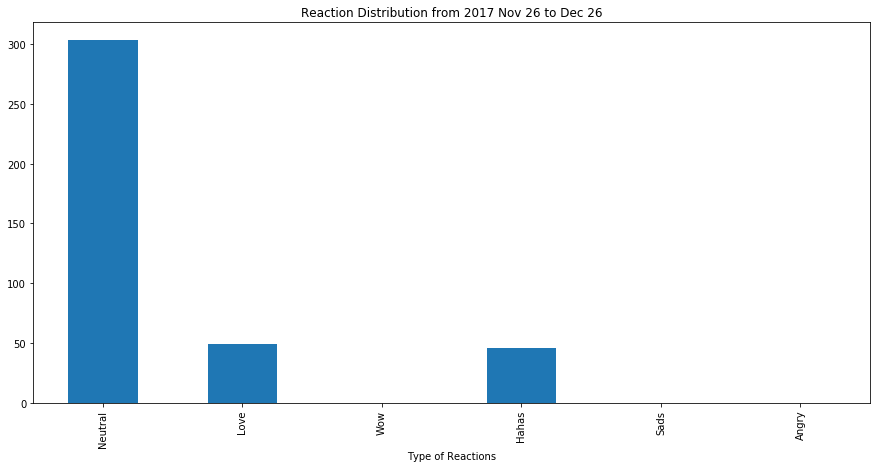

In [1]:
#THIS CODE IS USED TO CONVERT CSV FILE TO A BAR CHART USING MATPLOTLIB AND PANDAS
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read data from csv
data = pd.read_csv('reactions_total.csv', usecols=['num_reactions','total'])
#set reactions as index
data.set_index('num_reactions', inplace=True)

#plot data

fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('Reaction Distribution from 2017 Nov 26 to Dec 26')
data.plot(kind='bar', ax=ax)
plt.xlabel("Type of Reactions")
ax.legend_.remove()
plt.savefig('reactions.png')

In [5]:
#code use to make the wordcloud
from os import path
from wordcloud import WordCloud
from nltk.corpus import stopwords

convert_wordcloud = 'newComment.txt'

# Read the whole text.
text = open(convert_wordcloud).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

stop_Words = stopwords.words('english') + ['rt', 'via', 'bit', 'ly', 'get','https', 'www', 'com']
wordcloud = WordCloud(stopwords=stop_Words,
                      background_color='black',
                      width=1800,
                      height=1400).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('hahanoyume.png', dpi=1000)
plt.show()

ImportError: DLL load failed: The specified module could not be found.

Input sentence =  so now i know.. im an A hole parent 😂😂

Line: so now i know.. im an A hole parent 😂😂
Sentiment(polarity=0.0, subjectivity=0.0)
neutral

THE SENTENCE IS NEUTRAL
0
Input sentence =  Perle Kam 😂😂😂

Line: Perle Kam 😂😂😂
Sentiment(polarity=0.0, subjectivity=0.0)
neutral

THE SENTENCE IS NEUTRAL
1
Input sentence =  Jessey Ling

Line: Jessey Ling
Sentiment(polarity=0.0, subjectivity=0.0)
neutral

THE SENTENCE IS NEUTRAL
2
Input sentence =  Definitely can relate to this for my boys😂😂 haha..

Line: Definitely can relate to this for my boys😂😂 haha..
Sentiment(polarity=0.1, subjectivity=0.4)
positive

THE SENTENCE IS +ve
1
Input sentence =  Jysica Leron Chua Melissa Jonas Kok next time ur gal gal can wear tgt sure v cute!!

Line: Jysica Leron Chua Melissa Jonas Kok next time ur gal gal can wear tgt sure v cute!
Sentiment(polarity=0.375, subjectivity=0.6296296296296297)
positive

Line: !
Sentiment(polarity=0.0, subjectivity=0.0)
neutral

THE SENTENCE IS +ve
2
Input sentence =  "We

/Users/Goof/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


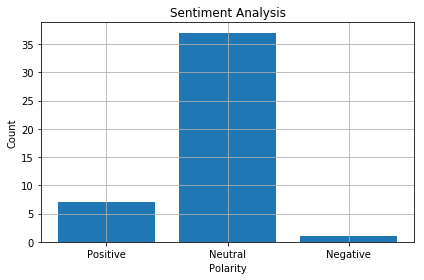

In [126]:
if __name__ == "__main__":
    
    Sentence_polarity_pos =0
    Sentence_polarity_neutral = 0
    Sentence_polarity_neg = 0
    

    inputfile = open("newComment.txt", "r")
    outputfile = open("FBTEXTSentimentBySentence.txt", "w")


    for line in inputfile:
        try:
            
            Count_neg=0
            Count_neutral=0
            Count_pos=0
            
            #print(line)
            line = TextBlob(line)
           
            print ("Input sentence = ", line.strip() + "\n")
            outputfile.write("Input sentence = " + str(line).strip() +"\n")
            
            for each_line in line.sentences:
                print("Line: " + str(each_line))
                print(each_line.sentiment)
                outputfile.write(str(each_line.sentiment)+"\n")

                if each_line.sentiment.polarity < 0.0:
                    print(each_line.sentiment)
                    print ("negative" + "\n")
                    outputfile.write (str(each_line)+"\n")
                    outputfile.write ("negative\n\n")
                    Count_neg +=1
                elif each_line.sentiment.polarity == 0:
                    print ("neutral" + "\n")
                    outputfile.write (str(each_line)+"\n")
                    outputfile.write ("neutral\n\n")
                    Count_neutral +=1
                else:
                    print ("positive" + "\n")
                    outputfile.write (str(each_line)+"\n")
                    outputfile.write ("positive\n\n")
                    Count_pos +=1

                    
            if Count_pos > Count_neg: 
                print ("THE SENTENCE IS +ve")
                outputfile.write ("The sentence has Positive sentiment\n\n")
                Sentence_polarity_pos += 1
                print (Sentence_polarity_pos)

            elif (Count_pos == Count_neg):  
                print ("THE SENTENCE IS NEUTRAL")
                outputfile.write ("The sentence is Neutral\n\n")
                print (Sentence_polarity_neutral)
                Sentence_polarity_neutral += 1

            else:
                print ("THE SENTENCE IS -ve") 
                outputfile.write ("The sentence has Negative sentiment\n\n")
                Sentence_polarity_neg += 1
                print (Sentence_polarity_neg)
           
            outputfile.write("=============================================================\n")
            print("========================================================================")
        except:
            continue

    print ("Sentence Polarity Negative = ",Sentence_polarity_neg )
    print ("Sentence Polarity Neutral = ",Sentence_polarity_neutral )
    print ("Sentence Polarity Positive = ",Sentence_polarity_pos )
    outputfile.write ("Sentence Polarity Negative = %s \n"%Sentence_polarity_neg )
    outputfile.write ("Sentence Polarity Neutral = %s \n"%Sentence_polarity_neutral )
    outputfile.write ("Sentence Polarity Positive = %s \n"%Sentence_polarity_pos )

    Polarity = [1,2,3]
    LABELS = ["Positive", "Neutral", "Negative"]
    Count_polarity = [Sentence_polarity_pos, Sentence_polarity_neutral, Sentence_polarity_neg]

    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.title('Sentiment Analysis')

    plt.grid(True)
    plt.bar(Polarity, Count_polarity, align='center')
    plt.xticks(Polarity, LABELS)
    plt.show()
    
outputfile.close()

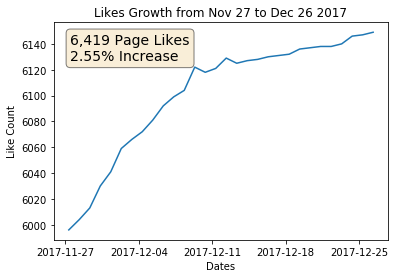

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
like_growth = pd.read_csv("newDateFile.csv")
like_growth['date'] = pd.to_datetime(like_growth['date'])

ax = plt.subplot()
ax.plot(like_growth['date'],like_growth['like'])
ax.set_title("Likes Growth from Nov 27 to Dec 26 2017")
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
textstr = "6,419 Page Likes\n2.55% Increase"
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
    verticalalignment='top', bbox=props )
plt.xlabel("Dates")
plt.ylabel("Like Count")
plt.savefig('Likes Growth.png')
plt.show()


## Haha no Yume's Facebook Dashboard

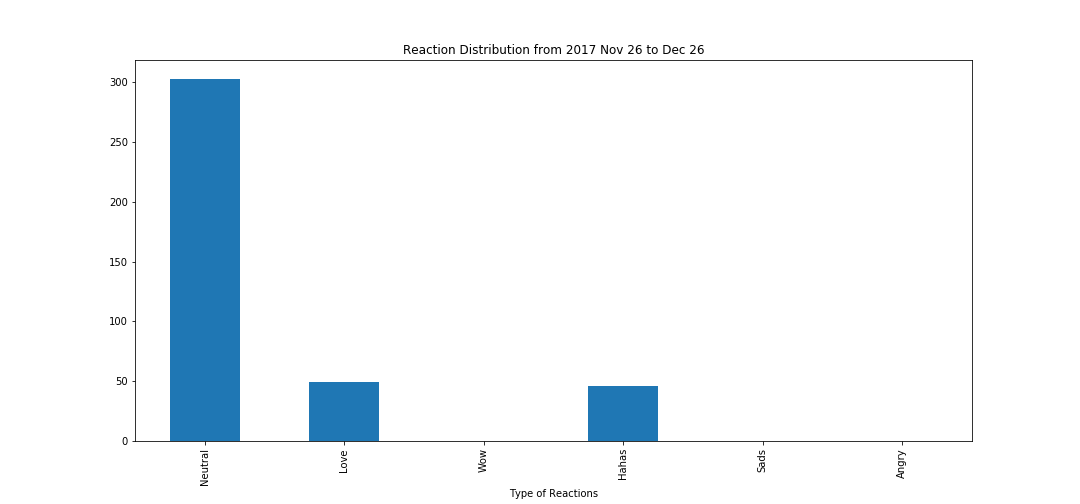

## Frequent Keywords from Comments
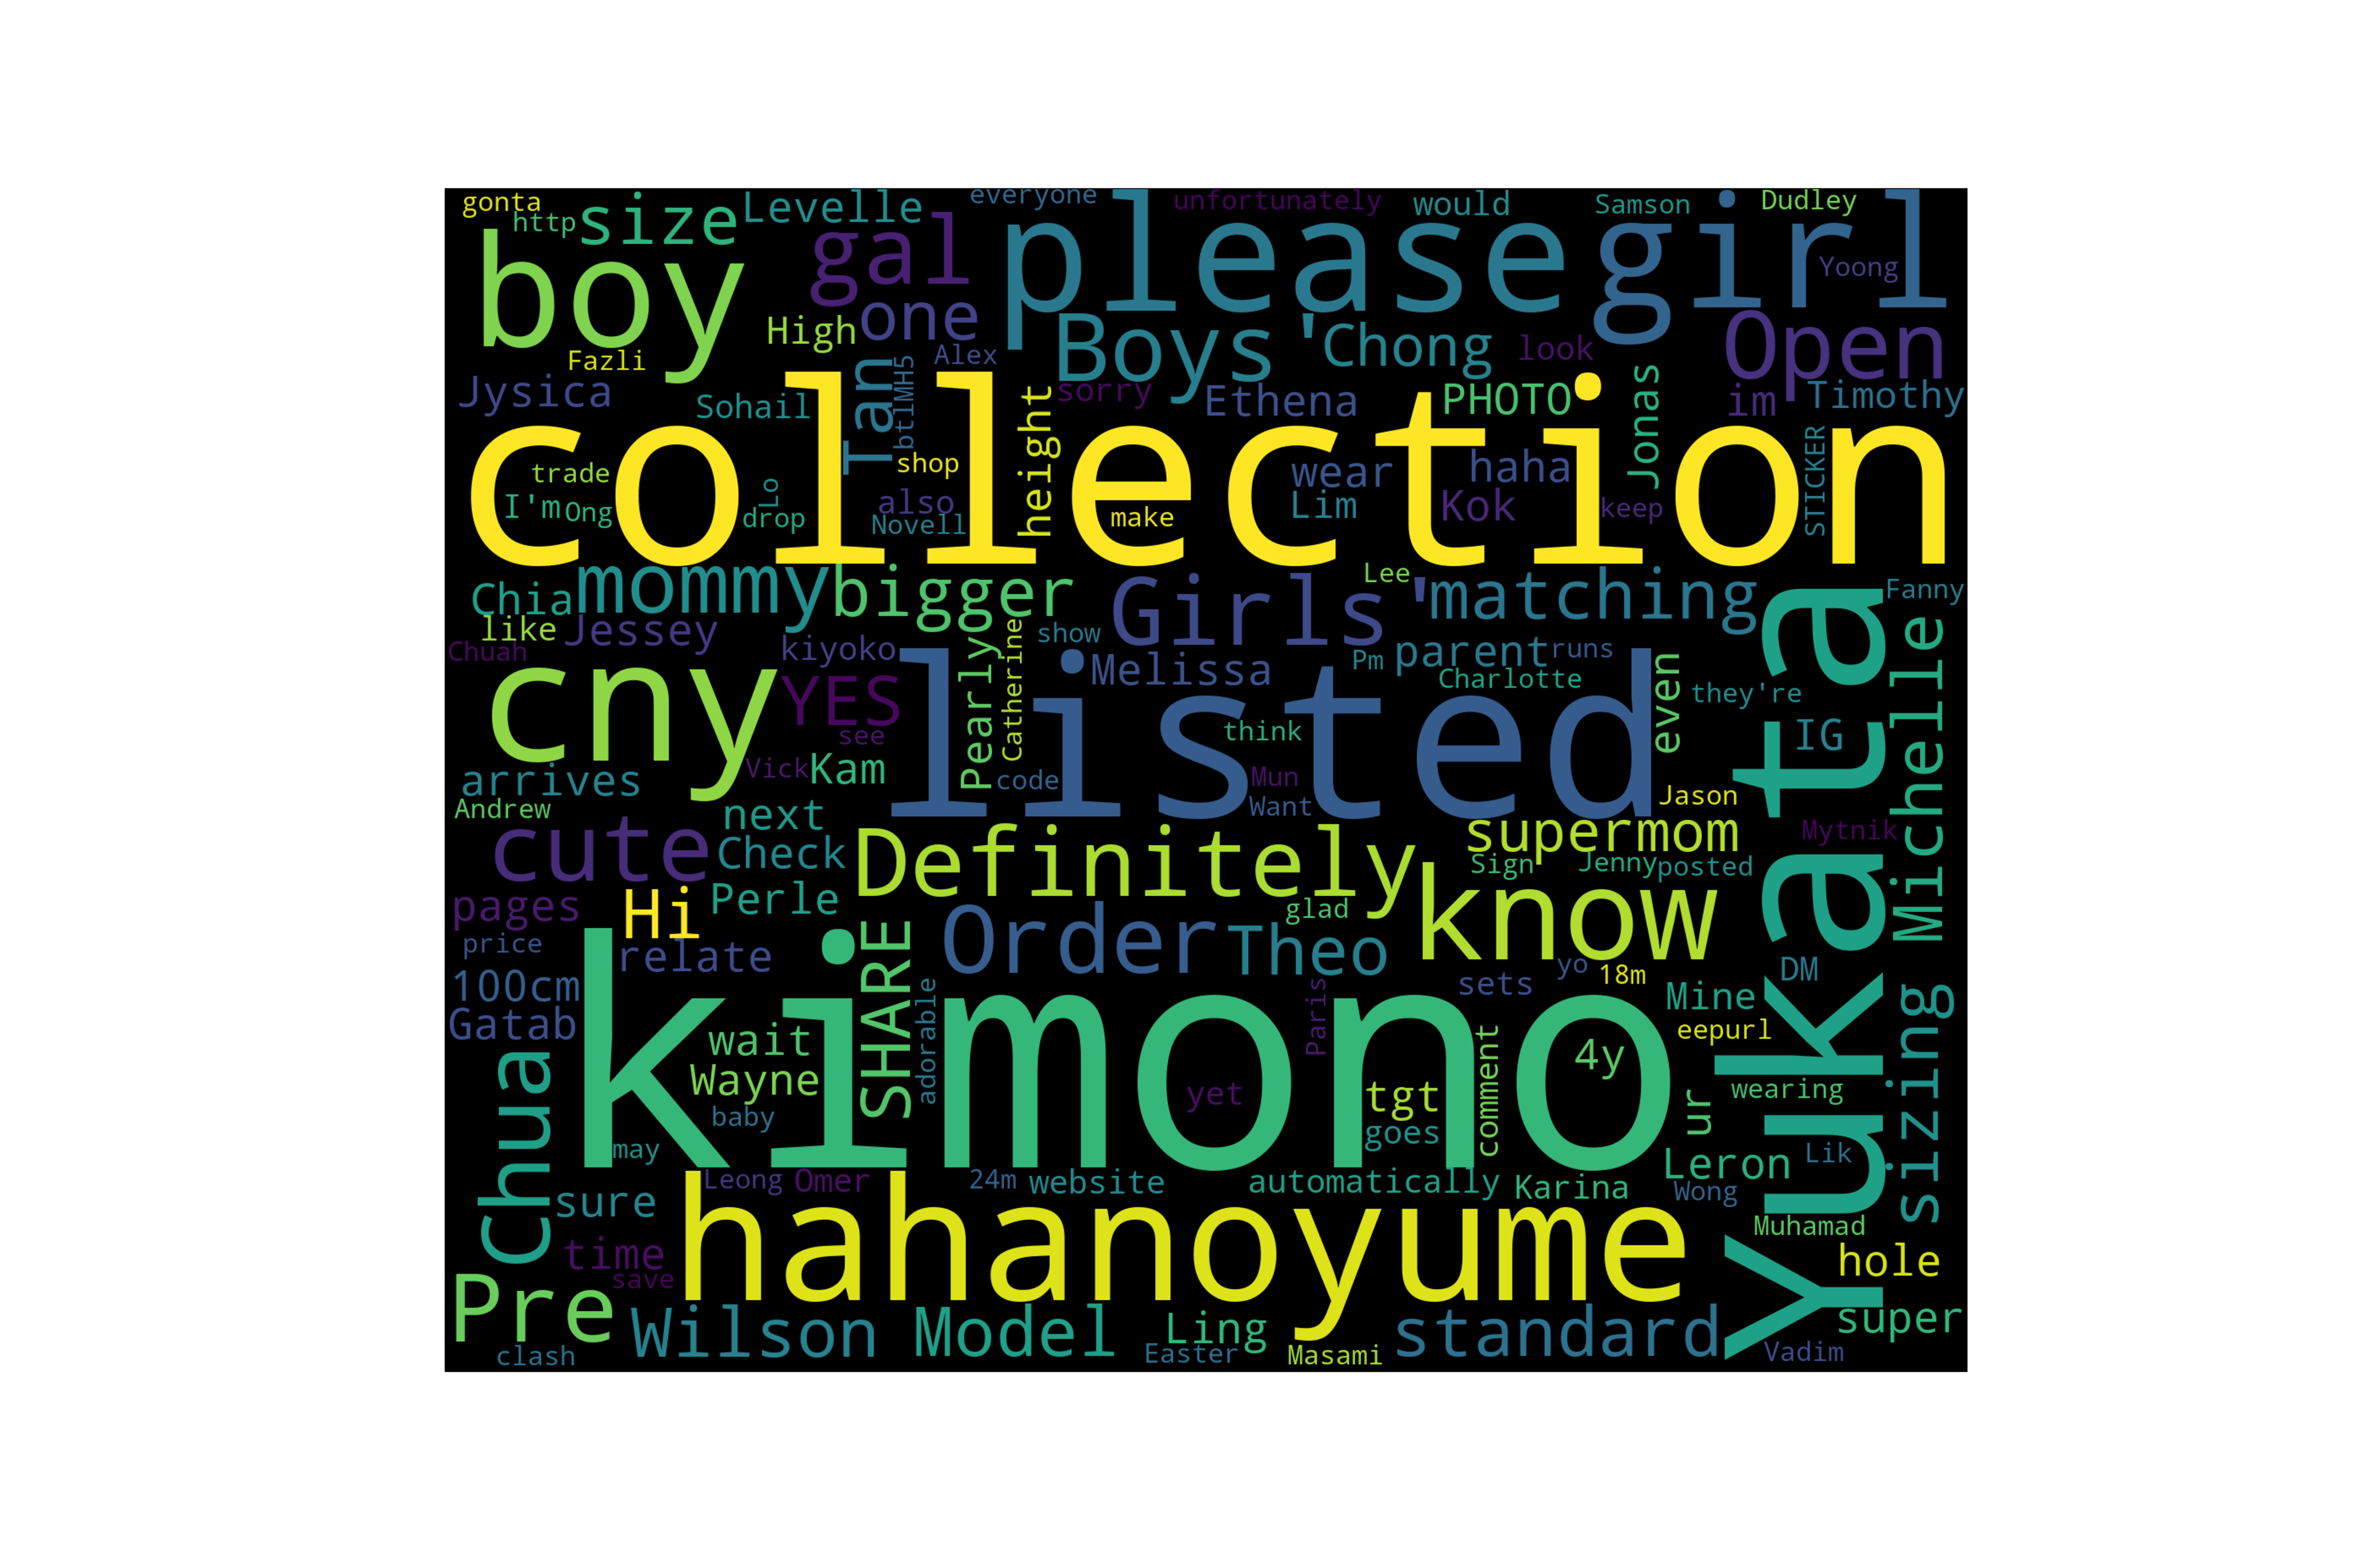

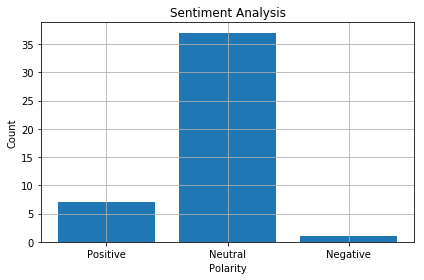

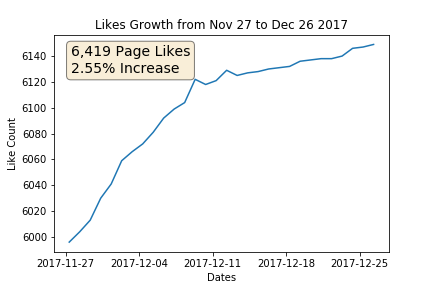